<a href="https://colab.research.google.com/github/preetamjumech/Deployment-of-Deep-Learning-models-on-edge-devices/blob/main/Deployment_of_Deep_Learning_models_on_edge_devices_03_01_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(f"tensorflow version: {tf.__version__}")
print(f"is gpu available: {tf.config.list_physical_devices('GPU')}")

tensorflow version: 2.17.1
is gpu available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [29]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_train dtype: {X_train.dtype}")
print(f"y_train dtype: {y_train.dtype}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_train dtype: uint8
y_train dtype: uint8


In [31]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [32]:
y_train[0]

5

In [33]:
print(f"possible values of y: {np.unique(y_train)}")

possible values of y: [0 1 2 3 4 5 6 7 8 9]


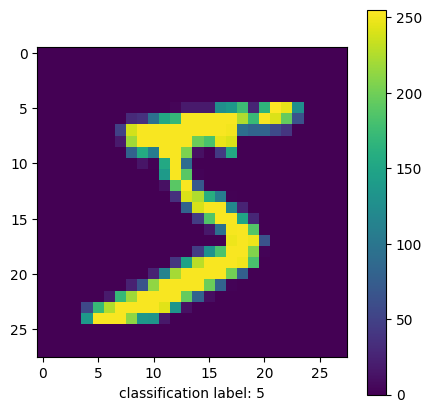

In [34]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel(f"classification label: {y_train[0]}")
plt.show()

In [35]:
X_train = X_train/255.0
X_test = X_test/255.0

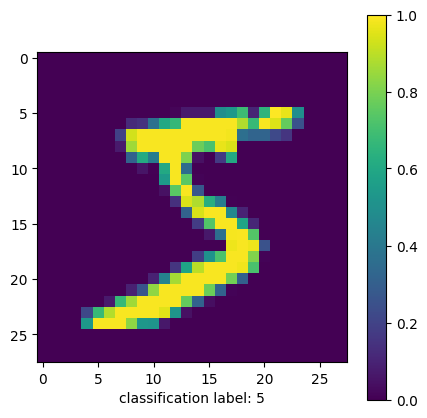

In [36]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel(f"classification label: {y_train[0]}")
plt.show()

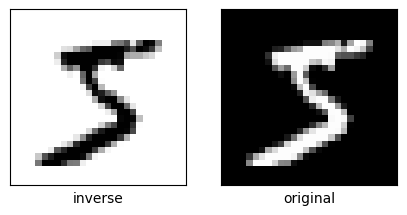

In [37]:
plt.figure(figsize= (5,5))
plt.subplot(1,2,1)

plt.xticks([])
plt.yticks([])
plt.xlabel("inverse")
plt.imshow(X_train[0], cmap=plt.cm.binary)

plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.xlabel("original")
plt.imshow(X_train[0], cmap=plt.cm.gray)

In [38]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28), name = "flat_1"),
    keras.layers.Dense(100, activation = tf.nn.relu, name = "dense_1"),
    keras.layers.Dropout(0.2, name = "dropout_1"),
    keras.layers.Dense(10, activation = tf.nn.softmax, name = "dense_2")
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = [ "accuracy"]
)

In [40]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flat_1 (Flatten)                     │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
!pip install pydot
!pip install graphviz

In [42]:
import pydot
import graphviz

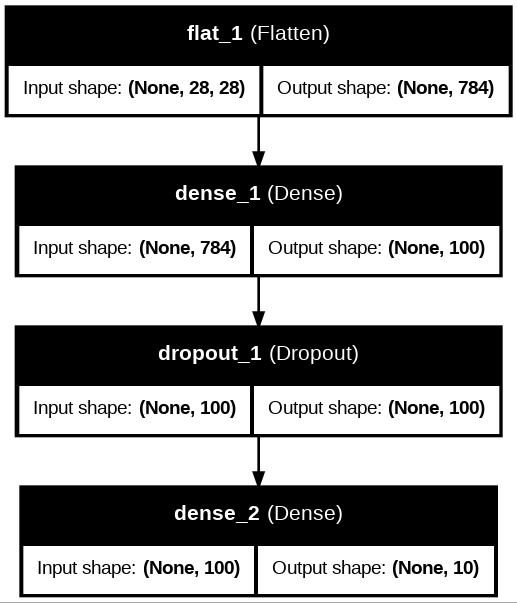

In [43]:
tf.keras.utils.plot_model(
    model, to_file = "model.jpg", show_shapes = True, show_layer_names = True,
    rankdir = "TB", expand_nested = True, dpi = 96
)

In [44]:
model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8438 - loss: 0.5296
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9469 - loss: 0.1763
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9626 - loss: 0.1226
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9691 - loss: 0.0990
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9737 - loss: 0.0810
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9751 - loss: 0.0748
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9776 - loss: 0.0666
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9793 - loss: 0.0611
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9821 - loss: 0.0557
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9819 - loss: 0.0532
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9830 - loss: 0.0504
Epoch 12/20
1875/1875 ━━━━━━━━

In [45]:
test_loss , test_acc = model.evaluate(X_test, y_test)
print(f"test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9762 - loss: 0.0993
test accuracy: 0.9799000024795532


In [46]:
example = X_test[0]

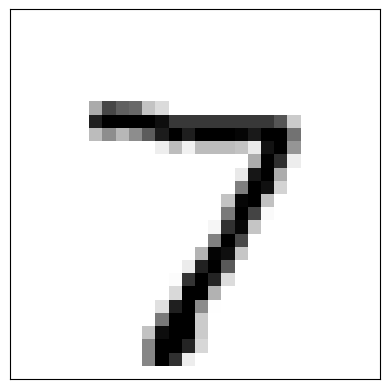

In [47]:
plt.grid(True)
plt.xticks([])
plt.yticks([])
plt.imshow(example, cmap = plt.cm.binary)

In [48]:
example_img_as_input = np.expand_dims(example,0)
print(f"input data shape: {example_img_as_input.shape}")

input data shape: (1, 28, 28)


In [49]:
pred = model.predict(example_img_as_input)
print(f"prediction results: {pred}")
print()
print(f"predicted value: {np.argmax(pred)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
prediction results: [[9.2329498e-14 1.3194083e-11 8.8555760e-11 2.3138612e-07 4.9333274e-19
  3.9631618e-12 3.0592590e-20 9.9999976e-01 2.3750312e-12 1.4761110e-09]]

predicted value: 7


In [50]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100 * np.max(predictions_array),
                                         true_label),
               color=color)

In [51]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


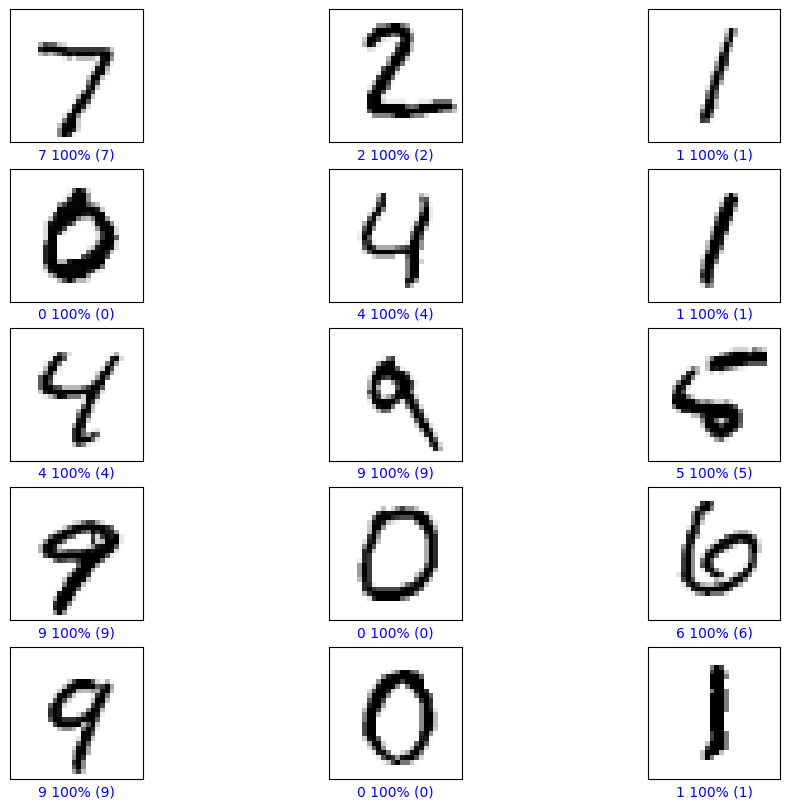

In [52]:
predictions = model.predict(X_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2  *2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  # plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # plot_value_array(i, predictions, labels_test)

In [53]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Restored model: {100*acc:5.2f}%")

print(f"Restored model: {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9762 - loss: 0.0993
Restored model: 97.99%
Restored model: 0.08020364493131638


In [54]:
saved_model_dir = "mnist_model.h5"
model.save(saved_model_dir)

In [55]:
tflite_model_file = "converted_model.tflite"
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpwu0pf8ns'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_10')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  137348232671856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137348232666048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137348232670800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137348232666752: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [56]:
len(tflite_model)

319988

In [57]:
tflite_quantized_model_file = "converted_quantized_model.tflite"
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()
with open(tflite_quantized_model_file, "wb") as f:
    f.write(tflite_quantized_model)

Saved artifact at '/tmp/tmpov61ayxa'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor_10')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  137348232671856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137348232666048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137348232670800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137348232666752: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [58]:
len(tflite_quantized_model)

86048

In [59]:
import os
print(f"tflite model size: {os.path.getsize(tflite_model_file)}")
print(f"tflite quantized model size: {os.path.getsize(tflite_quantized_model_file)}")

tflite model size: 319988
tflite quantized model size: 86048


### ONNX fromat

In [86]:
!pip install -U tf2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.


In [1]:
!pip install tensorflow-model-optimization

In [16]:
import tensorflow_model_optimization as tfmot
from tensorflow_model_optimization.python.core.keras.compat import keras

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
# Define your model using `keras` from `tensorflow_model_optimization`
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)


q_aware_model = tfmot.quantization.keras.quantize_model(model)


# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

q_aware_model.summary()

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2678 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1215 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0863 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0652 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0521 - accuracy: 0.9839
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLa  (None, 28, 28)            3         
 yer)                                                            
                                                                 
 quant_flatten (QuantizeWra  (None, 784)               1         
 pperV2)                                                         
             

In [17]:
q_aware_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 0.0438 - accuracy: 0.9865
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0342 - accuracy: 0.9894
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0287 - accuracy: 0.9911
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0243 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0198 - accuracy: 0.9941


In [18]:
saved_model_dir = "mnist_saved_model"
q_aware_model.save(saved_model_dir, save_format="tf")

Converting this TFLite model directly to ONNX might be tricky since there isn't a direct TFLite-to-ONNX conversion tool.

To proceed, you may need to convert the quantized TFLite model to another format that's easier to handle, or manually re-create the model in TensorFlow, then convert it to ONNX.

In [19]:
!python -m tf2onnx.convert --saved-model mnist_saved_model --opset 8 --output mnist_model.onnx

2025-01-03 12:25:57.082336: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-03 12:25:57.104089: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-03 12:25:57.110437: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-03 12:25:58.112405: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
I

In [20]:
import onnx
model = onnx.load_model('mnist_model.onnx')

with open("mnist_model.onnx.ir", 'w') as fp:
    fp.write(str(onnx.helper.printable_graph(model.graph)))

fp = open("mnist_model.onnx.txt", 'w')
for line in str(model):
    fp.write(line);
fp.close()

In [21]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.2 MB/s eta 0:00:00


In [ ]:
import onnxruntime
import numpy as np


# Load the ONNX model
session = onnxruntime.InferenceSession("mnist_model.onnx")
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# Preprocess the data
X_test = X_test.astype(np.float32).reshape(-1, 1, 8, 8)  # Reshape for MNIST

# Perform inference
predictions = []
for image in X_test:
    results = session.run([output_name], {input_name: image[np.newaxis, ...]})
    predicted_class = np.argmax(results[0])
    predictions.append(predicted_class)

# Evaluate accuracy
accuracy = np.mean(np.array(predictions) == y_test)
print(f"Accuracy on X_test: {accuracy:.2f}")